In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pygame

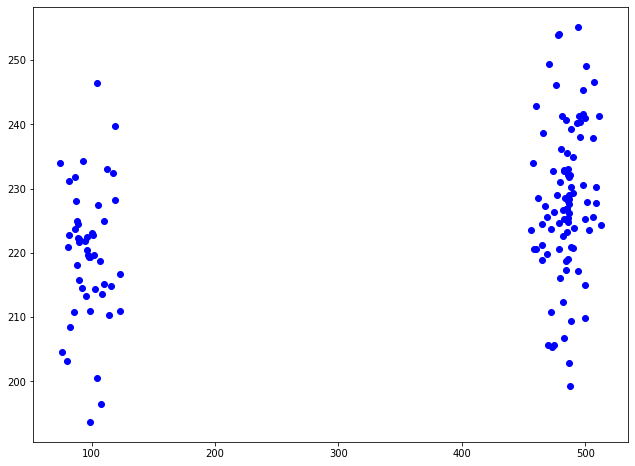

In [16]:
points = np.empty((0,2), dtype='f')

c_color = (0,0,255)
c_thickness = 0 
c_radius = 2

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("#3")

is_running = True
is_pushing = False
while is_running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            is_running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            is_pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            is_pushing = False
            
    if is_pushing:
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0,30)
        t = np.random.uniform(0,2*np.pi)
        coord = [x+r*np.cos(t), y+r*np.sin(t)]
        global points
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),int(point[1])),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points[:,0],points[:,1],c="blue")
plt.show()

In [17]:
class K_Means():
    
    def __init__(self, dataset, n_clusters=3, dist_type = "e"):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.labels = np.array([], dtype='i')
        self.centroids = self.rand_сentroids()
        self.max_n_iter = 100
        self.tolerance = self.calc_tolerance()
        self.fitted = False
        self.dist_type = dist_type

    def rand_сentroids(self):
        dataset_min = np.amin(self.dataset, axis = 0)
        dataset_max = np.amax(self.dataset, axis = 0)
        print(dataset_min)
        print(dataset_max)
        return np.array([[np.random.uniform(i,j) for i,j in zip(dataset_min, dataset_max)] for k in range (0, self.n_clusters)])


    def calc_tolerance(self):
        dataset_min = np.amin(self.dataset, axis = 0)
        dataset_max = np.amax(self.dataset, axis = 0)
        min_range = dataset_max[0] - dataset_min[0]
        for i in range(1, self.dataset.shape[1]):
            if min_range > (dataset_max[i] - dataset_min[i]):
                min_range = dataset_max[i] - dataset_min[i]
        return min_range / 10000

        
    def get_dist(self, list1, list2):
        if self.dist_type == "e":
            return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
        if self.dist_type == "e2":
            return sum((i-j)**2 for i,j in zip(list1,list2))
        if self.dist_type == "m":
            return sum(abs(i-j) for i,j in zip(list1,list2))
        if self.dist_type == "ch":
            return max(abs(i-j) for i,j in zip(list1,list2))
        raise Exception("Wrong distance type.")
        
    
    def distribute_data(self):
        self.labels = np.array([], dtype='i')
        for data in self.dataset:
            self.labels = np.append(self.labels, np.array([self.get_dist(data,center) for center in self.centroids]).argmin())
            
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k,label in enumerate(self.labels):
                if label == i:
                    temp += self.dataset[k]
                    num += 1
            if (num != 0):
                self.centroids[i] = temp/num
            
    def fit(self):
        i = 0
        while i < self.max_n_iter:
            prev_centroids = self.centroids.copy()
            self.distribute_data()
            self.recalculate_centroids()
            if np.array([self.get_dist(i,j) for i,j in zip(prev_centroids,self.centroids)]).max()\
            < self.tolerance:
                break
            i += 1
        self.fitted = True
        
    def get_lables(self, list2d):
        if not self.fitted:
            raise Exception("Can not receive lables if centroids were not calculated")
        labels = np.array([], dtype='i')
        for data in list2d:
            labels = np.append(labels, np.array([self.get_dist(data,center) for center in self.centroids]).argmin())
        return labels

        
        


[ 74.62797428 193.67041843]
[512.94942983 255.18461087]


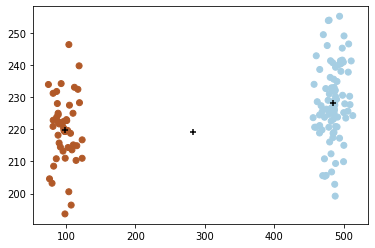

In [18]:
kmeans = K_Means(points, n_clusters=3, dist_type="e")

kmeans.fit()

plt.scatter(points[:,0],points[:,1],c=kmeans.labels,cmap=plt.cm.Paired)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],c='black',marker='+')
kmeans.get_lables(np.array([[200, 200], [300,400], [500, 150], [300, 100]]))
plt.show() # show picture reversed